# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**COLETTE, MUIRURI**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|In this seection we imported all the packages we used in the rest of the notebook|

---

In [174]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Libraries for data preparation and model building
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Setting global constants to ensure notebook results are reproducible


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [175]:
df = pd.read_csv('df_train.csv')


In [176]:
df_test = pd.read_csv('df_test.csv')

In [177]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [178]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


We remove the column unamed from the dataframe since it seems as thugh it is an index column hence does not contribute to our analysis and eventual modelling.

In [179]:
df = df.drop(columns=['Unnamed: 0'])

In [180]:
df_test = df_test.drop(columns=['Unnamed: 0'])

In [181]:
df.shape

(8763, 48)

In [182]:
df_test.shape

(2920, 47)

In [183]:
df_test.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In this section, we will first analyze and clean the data in the df_test dataframe

In [184]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,2920.0,2.457820,1.774838,0.000000,1.333333,2.000000,3.333333,13.333333
Bilbao_rain_1h,2920.0,0.067517,0.153381,0.000000,0.000000,0.000000,0.000000,1.600000
Valencia_wind_speed,2920.0,3.012785,1.996340,0.000000,1.666667,2.333333,4.000000,14.333333
Seville_humidity,2920.0,67.123516,20.611292,11.666667,52.000000,70.333333,85.000000,100.000000
Madrid_humidity,2920.0,62.644463,24.138393,8.000000,43.000000,63.000000,84.000000,100.000000
Bilbao_clouds_all,2920.0,43.355422,30.486298,0.000000,13.333333,45.000000,75.000000,97.333333
Bilbao_wind_speed,2920.0,2.283562,1.654787,0.000000,1.000000,1.666667,3.333333,10.666667
Seville_clouds_all,2920.0,15.477283,25.289197,0.000000,0.000000,0.000000,20.000000,93.333333
Bilbao_wind_deg,2920.0,162.643836,97.749873,0.000000,86.666667,140.000000,233.333333,360.000000
Barcelona_wind_speed,2920.0,2.518094,1.625507,0.000000,1.333333,2.000000,3.666667,12.666667


From the above analysis, we suspect that the following columns have obvious outliers: Seville_clouds_all, Madrid_clouds_all, Madrid_weather_id, Barcelona_weather_id and Bilbao_weather_id. We will then test this hypothesis by plotting box plots for each of these columns to observe the behaviour. 

In [185]:
def draw_box_plots(dataframe, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 6))
    fig.subplots_adjust(wspace=0.5)

    for i, column in enumerate(columns):
        ax = axes[i]
        ax.boxplot(dataframe[column].dropna())
        ax.set_title(column)
        ax.set_ylabel('Values')

    plt.show()


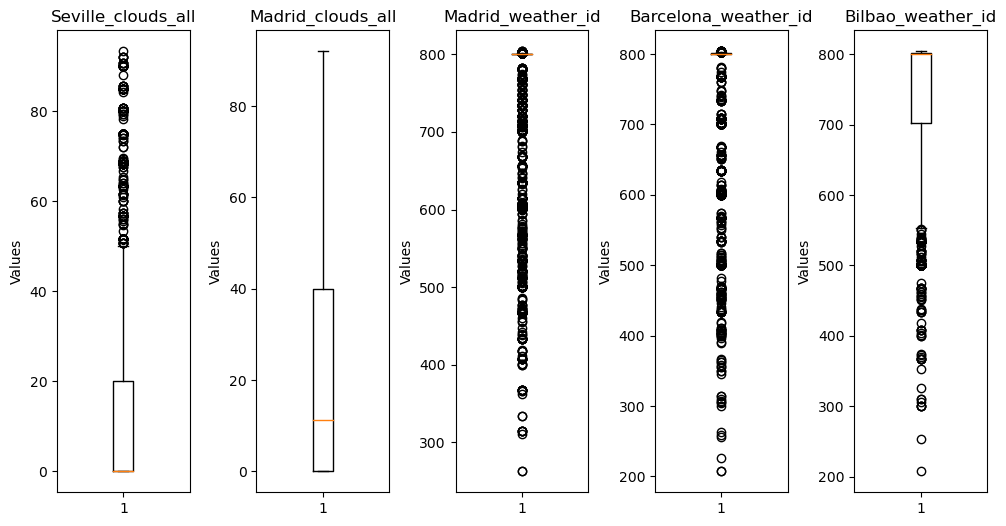

In [186]:
columns_to_plot = ['Seville_clouds_all', 'Madrid_clouds_all', 'Madrid_weather_id','Barcelona_weather_id','Bilbao_weather_id']
draw_box_plots(df_test, columns_to_plot)

The above box plots give us the assumption that something might be wrong with the weather_id columns in the dataframe. We will further analyze this data.

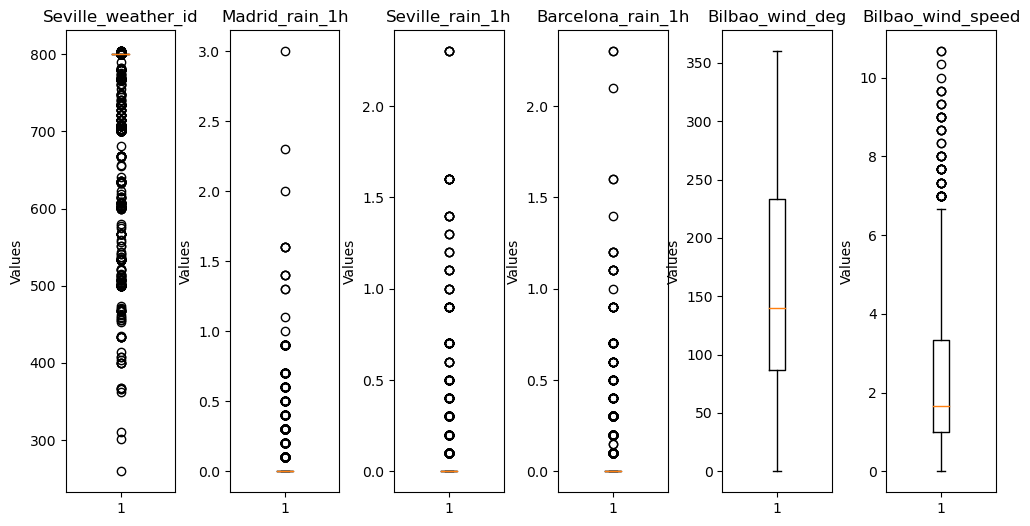

In [187]:
columns_to_plot = ['Seville_weather_id', 'Madrid_rain_1h', 'Seville_rain_1h','Barcelona_rain_1h','Bilbao_wind_deg','Bilbao_wind_speed']
draw_box_plots(df_test, columns_to_plot)

On dealing with outliers, we will drop all the weather_id columns as the data seems to be riddled with outliers. We also assume that this weather_id is not likely to influence the load_shortfall_3h

In [188]:
columns_to_drop = ['Madrid_weather_id','Barcelona_weather_id','Bilbao_weather_id','Seville_weather_id']
df_test.drop(columns_to_drop, axis=1, inplace = True)


In [189]:
df_test.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'],
      dtype='object')

In [190]:
from scipy import stats

def remove_outliers(dataframe, columns, threshold=3):
    df_test_cleaned = dataframe.copy()

    for column in columns:
        z_scores = np.abs(stats.zscore(df_test_cleaned[column]))
        mask = z_scores > threshold
        df_test_cleaned.loc[mask, column] = np.nan

    df_test_cleaned.dropna(inplace=True)
    return df_test_cleaned


In [191]:
columns_to_clean = ['Seville_clouds_all', 'Madrid_clouds_all', 'Madrid_rain_1h','Seville_rain_1h','Barcelona_rain_1h','Bilbao_wind_speed']
df_test_cleaned= remove_outliers(df_test, columns_to_clean, threshold=3)


Now working with the outliers in the df_train dataset

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


This time, we will check for the Z scores for each of the volumns with a value greater than three then we will drop the outliers present in the data.

In [193]:
columns_to_drop = ['Madrid_weather_id','Barcelona_weather_id','Bilbao_weather_id','Seville_weather_id']
df.drop(columns_to_drop, axis=1, inplace = True)


In [194]:
columns_to_clean = ['Valencia_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg','Barcelona_wind_deg','Madrid_clouds_all','Barcelona_pressure']
df_cleaned = remove_outliers(df, columns_to_clean, threshold=3)

In [195]:
df_cleaned.shape

(6430, 44)

In [196]:
df_test_cleaned.shape

(2241, 43)

The code cell below shows that The column with missing values is Valencia_pressure and the missing values only constitute of 15% of all the missing data in the training dataset therefore instead of dropping we can use imputation

In [197]:

df_test_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,2241.0,2.486911,1.683347,0.000000,1.333333,2.000000,3.333333,10.000000
Bilbao_rain_1h,2241.0,0.068652,0.153806,0.000000,0.000000,0.000000,0.100000,1.600000
Valencia_wind_speed,2241.0,2.992563,1.896829,0.000000,1.666667,2.333333,4.000000,14.333333
Seville_humidity,2241.0,65.059646,20.932056,11.666667,49.666667,68.000000,83.000000,100.000000
Madrid_humidity,2241.0,58.679830,23.968562,8.000000,39.000000,57.333333,79.666667,100.000000
Bilbao_clouds_all,2241.0,44.994125,29.924315,0.000000,20.000000,50.000000,75.000000,97.333333
Bilbao_wind_speed,2241.0,2.203778,1.474956,0.000000,1.000000,1.666667,3.000000,7.000000
Seville_clouds_all,2241.0,14.749219,24.138306,0.000000,0.000000,0.000000,20.000000,90.666667
Bilbao_wind_deg,2241.0,167.226238,100.153816,0.000000,86.666667,146.666667,243.333333,360.000000
Barcelona_wind_speed,2241.0,2.344117,1.493137,0.000000,1.333333,2.000000,3.333333,12.666667


In [198]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,6430.0,2.570555,1.847233,0.000000,1.000000,2.000000,3.666667,13.000000
Bilbao_rain_1h,6430.0,0.147224,0.387429,0.000000,0.000000,0.000000,0.100000,3.000000
Valencia_wind_speed,6430.0,2.610161,1.995767,0.000000,1.000000,2.000000,3.666667,9.666667
Seville_humidity,6430.0,60.742379,23.101272,8.333333,41.666667,62.666667,81.000000,100.000000
Madrid_humidity,6430.0,54.130249,24.117488,6.333333,33.416667,53.000000,75.333333,100.000000
Bilbao_clouds_all,6430.0,46.551374,31.601144,0.000000,16.666667,51.666667,75.000000,100.000000
Bilbao_wind_speed,6430.0,1.911820,1.732093,0.000000,0.666667,1.333333,2.666667,12.666667
Seville_clouds_all,6430.0,13.410498,22.647077,0.000000,0.000000,0.000000,20.000000,86.333333
Bilbao_wind_deg,6430.0,164.288025,104.947673,0.000000,76.666667,153.333333,250.000000,359.333333
Barcelona_wind_speed,6430.0,2.937014,1.803711,0.000000,1.666667,2.666667,4.000000,12.666667


Below, we are trying to figure out what kind of data could be missing from the various cities. We notice that some of the cities have fewer variable entries which could lead to the incaccuracy of our model. 

In [199]:
def create_city_dataframe(df, city):
    """
    Creates a new dataframe with columns containing a specific city name.
    """
    cols = [col for col in df.columns if city.lower() in col.lower()]
    city_df = df[cols].copy()
    city_df.columns = [col.replace(f"{city}_", "") for col in city_df.columns]
    return city_df
bilbao_df = create_city_dataframe(df_cleaned, "Bilbao")
madrid_df = create_city_dataframe(df_cleaned, "Madrid")
valencia_df = create_city_dataframe(df_cleaned, "Valencia")
seville_df = create_city_dataframe(df_cleaned, "Seville")
barcelona_df = create_city_dataframe(df_cleaned, "Barcelona")

bilbao_df.shape

(6430, 9)

In [200]:
bilbao_df.columns

Index(['rain_1h', 'clouds_all', 'wind_speed', 'wind_deg', 'snow_3h',
       'pressure', 'temp_min', 'temp', 'temp_max'],
      dtype='object')

In [201]:
madrid_df.columns

Index(['wind_speed', 'humidity', 'clouds_all', 'rain_1h', 'pressure',
       'temp_max', 'temp', 'temp_min'],
      dtype='object')

In [202]:
valencia_df.columns

Index(['wind_deg', 'wind_speed', 'snow_3h', 'pressure', 'temp_max', 'temp',
       'humidity', 'temp_min'],
      dtype='object')

In [203]:
seville_df.columns

Index(['humidity', 'clouds_all', 'wind_speed', 'pressure', 'rain_1h',
       'rain_3h', 'temp_max', 'temp', 'temp_min'],
      dtype='object')

In [204]:
barcelona_df.columns

Index(['wind_speed', 'wind_deg', 'rain_1h', 'pressure', 'rain_3h', 'temp_max',
       'temp', 'temp_min'],
      dtype='object')

In this section, we are removing the "level_" sections from the various variables

In [205]:
df_cleaned['Valencia_wind_deg'] = df_cleaned['Valencia_wind_deg'].str.extract('(\d+)')
df_cleaned['Valencia_wind_deg'] = pd.to_numeric(df_cleaned['Valencia_wind_deg'])

df_cleaned['Seville_pressure'] = df_cleaned['Seville_pressure'].str.extract('(\d+)')
df_cleaned['Seville_pressure'] = pd.to_numeric(df_cleaned['Seville_pressure'])


In [206]:
df_cleaned.time.describe(datetime_is_numeric=True)
df_test_cleaned.time.describe(datetime_is_numeric=True)

count                    2241
unique                   2241
top       2018-01-04 15:00:00
freq                        1
Name: time, dtype: object

We now check for correlations within our data

In [207]:
orig_corr = df_cleaned.corr(numeric_only=True)
orig_corr

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.115119,0.220286,0.496686,-0.112823,-0.095811,0.218371,0.382789,0.153145,0.265711,...,0.027666,0.011685,0.019005,0.011385,0.024362,0.005418,0.063919,0.045981,0.033678,-0.116786
Valencia_wind_deg,0.115119,1.000000,0.201377,0.293023,0.257397,0.301715,0.149469,0.083880,0.093347,0.154549,...,-0.403979,-0.319037,-0.318795,-0.334430,-0.287727,-0.340553,-0.362573,-0.397473,-0.365119,-0.204496
Bilbao_rain_1h,0.220286,0.201377,1.000000,0.162678,0.077127,0.139718,0.352814,0.060244,0.046865,0.267324,...,-0.204178,-0.192702,-0.188331,-0.226500,-0.155041,-0.258213,-0.161873,-0.190288,-0.163500,-0.131817
Valencia_wind_speed,0.496686,0.293023,0.162678,1.000000,-0.140379,-0.042256,0.166424,0.443715,0.127942,0.244794,...,-0.018540,-0.020782,0.010320,0.010281,-0.001930,0.012440,0.031307,-0.006463,-0.017201,-0.106749
Seville_humidity,-0.112823,0.257397,0.077127,-0.140379,1.000000,0.794810,0.067357,-0.106699,0.434918,-0.098728,...,-0.717846,-0.623036,-0.614031,-0.608040,-0.597488,-0.583115,-0.803799,-0.730927,-0.696022,-0.201051
Madrid_humidity,-0.095811,0.301715,0.139718,-0.042256,0.794810,1.000000,0.078714,-0.025453,0.438964,-0.041055,...,-0.803557,-0.667879,-0.620405,-0.621634,-0.616491,-0.602169,-0.770738,-0.805086,-0.752942,-0.190676
Bilbao_clouds_all,0.218371,0.149469,0.352814,0.166424,0.067357,0.078714,1.000000,0.042307,0.005428,0.286338,...,-0.109307,-0.080593,-0.134782,-0.176194,-0.066783,-0.213001,-0.117760,-0.107774,-0.102153,-0.111443
Bilbao_wind_speed,0.382789,0.083880,0.060244,0.443715,-0.106699,-0.025453,0.042307,1.000000,0.119461,0.430941,...,0.012211,-0.002715,0.095973,0.130256,0.002013,0.166000,0.046857,0.017463,0.006931,-0.064019
Seville_clouds_all,0.153145,0.093347,0.046865,0.127942,0.434918,0.438964,0.005428,0.119461,1.000000,0.012905,...,-0.314543,-0.265803,-0.200622,-0.205513,-0.231153,-0.201580,-0.273800,-0.308664,-0.294057,-0.076842
Bilbao_wind_deg,0.265711,0.154549,0.267324,0.244794,-0.098728,-0.041055,0.286338,0.430941,0.012905,1.000000,...,-0.022129,0.012706,0.048674,0.024137,0.034970,-0.001452,0.029430,-0.005494,0.002028,-0.108101


In [208]:
orig_corr['load_shortfall_3h']

Madrid_wind_speed      -0.116786
Valencia_wind_deg      -0.204496
Bilbao_rain_1h         -0.131817
Valencia_wind_speed    -0.106749
Seville_humidity       -0.201051
Madrid_humidity        -0.190676
Bilbao_clouds_all      -0.111443
Bilbao_wind_speed      -0.064019
Seville_clouds_all     -0.076842
Bilbao_wind_deg        -0.108101
Barcelona_wind_speed   -0.084701
Barcelona_wind_deg     -0.153002
Madrid_clouds_all      -0.078094
Seville_wind_speed     -0.001386
Barcelona_rain_1h      -0.059690
Seville_pressure       -0.105255
Seville_rain_1h        -0.019431
Bilbao_snow_3h         -0.031949
Barcelona_pressure     -0.004648
Seville_rain_3h        -0.033138
Madrid_rain_1h         -0.015287
Barcelona_rain_3h      -0.020036
Valencia_snow_3h       -0.021180
Bilbao_pressure        -0.010217
Valencia_pressure       0.063922
Seville_temp_max        0.130250
Madrid_pressure         0.051921
Valencia_temp_max       0.196517
Valencia_temp           0.229107
Seville_temp            0.200701
Valencia_h

Our conclusions from the above corelation values:
The columns with the least correlation with "load_shortfall_3h" are:

Barcelona_wind_deg (-0.116133)
Barcelona_rain_3h (-0.024720)
Valencia_snow_3h (-0.021633)
Madrid_weather_id (0.030868)
Barcelona_weather_id (0.063868)
Bilbao_pressure (0.039052)
Seville_weather_id (0.053965)
These columns have the lowest absolute correlation values with "load_shortfall_3h" among the provided columns.

<Axes: >

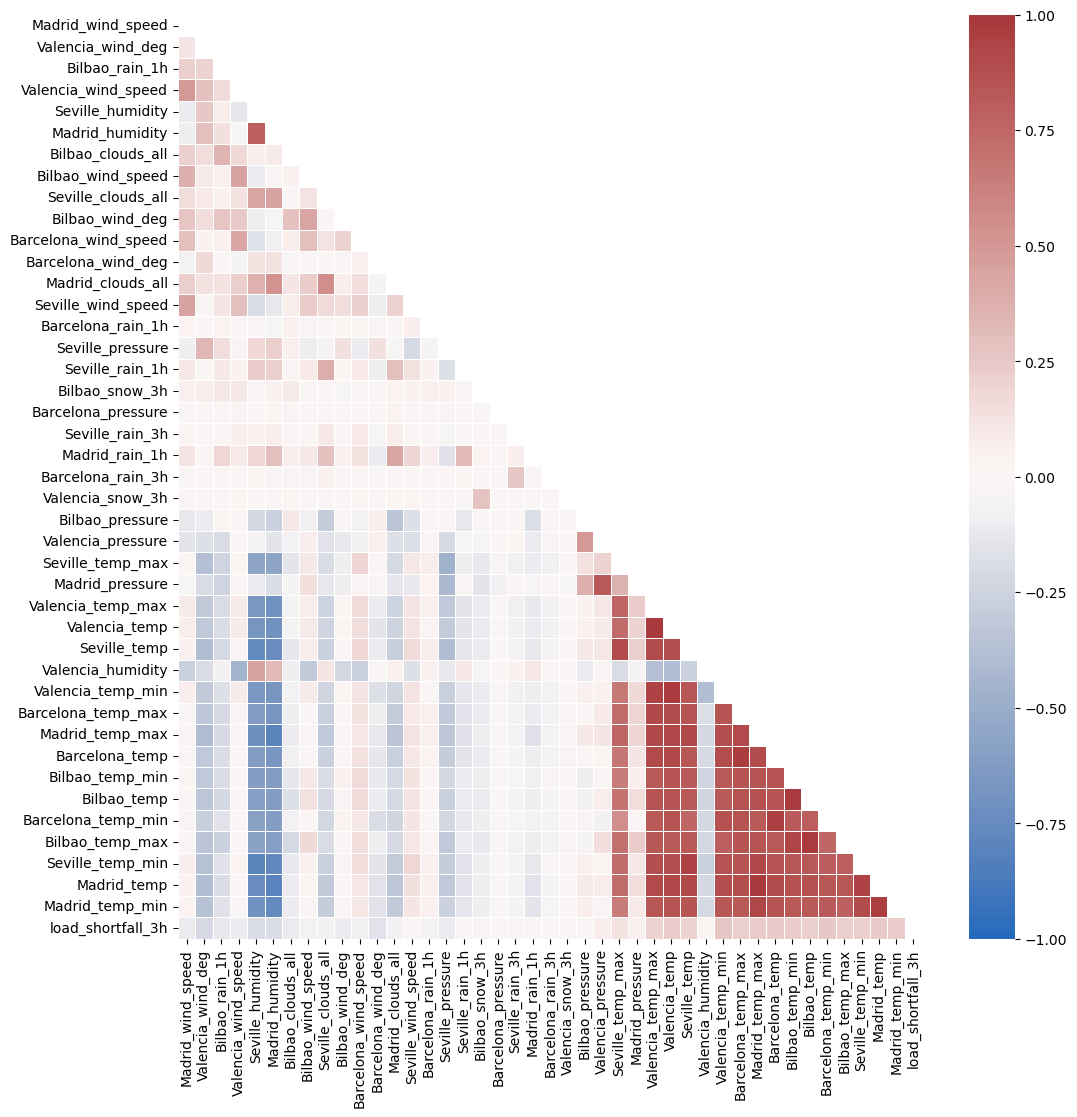

In [209]:
# Generate a mask for the upper triangle(same as lower)
mask = np.triu(np.ones_like(orig_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(orig_corr,
            vmin = -1, vmax = 1,
            mask = mask,
            linewidth=.5,
            center = 0,
            cmap='vlag')

We then look at those columns with very high correlations (+ or - 0.7)

In [210]:
orig_corr_cp = orig_corr.unstack()    # unnest the matrix
orig_high_corr = orig_corr_cp[(abs(orig_corr_cp) >= 0.7) & (orig_corr_cp != 1)]
orig_high_corr

Seville_humidity  Madrid_humidity       0.794810
                  Seville_temp         -0.756737
                  Madrid_temp_max      -0.717846
                  Seville_temp_min     -0.803799
                  Madrid_temp          -0.730927
                                          ...   
Madrid_temp_min   Bilbao_temp           0.820395
                  Barcelona_temp_min    0.819497
                  Bilbao_temp_max       0.786514
                  Seville_temp_min      0.894938
                  Madrid_temp           0.966546
Length: 220, dtype: float64

The code below shows all the columns with a high collinearity

In [211]:
orig_corr_cp = orig_corr.unstack()  # unnest the matrix
orig_high_corr = orig_corr_cp[(abs(orig_corr_cp) >= 0.7) & (orig_corr_cp != 1)]
orig_high_corr_columns = orig_high_corr.index.get_level_values(0).unique()

print("Columns with correlations >= 0.7:")
print(orig_high_corr_columns)

Columns with correlations >= 0.7:
Index(['Seville_humidity', 'Madrid_humidity', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Seville_temp', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
       'Madrid_temp_min'],
      dtype='object')


From the above, we can say that there exists high corelations in various variables within the data. Multicollinearity might therefore be something we will need to look into as we create our models

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [216]:
selected_columns = ['Seville_humidity', 'Madrid_humidity', 'Valencia_pressure',
                    'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
                    'Valencia_temp', 'Seville_temp', 'Valencia_temp_min',
                    'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
                    'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
                    'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
                    'Madrid_temp_min','load_shortfall_3h']

new_df = df_cleaned[selected_columns]


In [213]:
new_df.head()

,time,Seville_humidity,Madrid_humidity,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_temp_min,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,74.333333,64.000000,1002.666667,274.254667,971.333333,269.888000,269.888000,274.254667,269.888000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,78.333333,64.666667,1004.333333,274.945000,972.666667,271.728333,271.728333,274.945000,271.728333,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,71.333333,64.333333,1005.333333,278.792000,974.000000,278.008667,278.008667,278.792000,278.008667,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,65.333333,56.333333,1009.000000,285.394000,994.666667,284.899552,284.899552,285.394000,284.899552,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
6,2015-01-01 21:00:00,83.666667,63.333333,1006.000000,277.637000,974.333333,272.270333,272.270333,277.637000,272.270333,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333


In [214]:
df_test_cleaned.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
29,2018-01-04 15:00:00,5.333333,level_8,0.0,10.666667,72.000000,74.333333,20.000000,2.333333,90.0,...,294.816667,287.816667,294.816667,289.483333,290.803333,294.816667,292.816667,288.150000,286.946667,285.483333
30,2018-01-04 18:00:00,4.666667,level_7,0.0,6.333333,77.000000,81.333333,33.333333,5.000000,90.0,...,292.150000,286.150000,291.816667,285.483333,286.453333,291.483333,287.483333,287.816667,284.743333,282.816667
31,2018-01-04 21:00:00,5.000000,level_8,0.0,5.000000,82.000000,87.000000,13.333333,7.000000,90.0,...,289.483333,284.150000,289.170000,285.150000,287.830000,288.816667,291.150000,286.816667,283.323333,282.816667
32,2018-01-05 00:00:00,3.666667,level_9,0.0,7.666667,87.000000,89.000000,4.000000,6.000000,90.0,...,288.150000,283.150000,287.670000,286.816667,288.226667,287.150000,290.150000,285.816667,282.240000,281.483333
35,2018-01-05 09:00:00,4.333333,level_8,0.4,8.000000,83.666667,85.000000,75.000000,5.666667,85.0,...,287.150000,282.816667,286.523333,283.150000,283.693333,285.816667,284.483333,285.483333,281.863333,280.150000


In [215]:
new_df.head()

,time,Seville_humidity,Madrid_humidity,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_temp_min,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,74.333333,64.000000,1002.666667,274.254667,971.333333,269.888000,269.888000,274.254667,269.888000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,78.333333,64.666667,1004.333333,274.945000,972.666667,271.728333,271.728333,274.945000,271.728333,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,71.333333,64.333333,1005.333333,278.792000,974.000000,278.008667,278.008667,278.792000,278.008667,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,65.333333,56.333333,1009.000000,285.394000,994.666667,284.899552,284.899552,285.394000,284.899552,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
6,2015-01-01 21:00:00,83.666667,63.333333,1006.000000,277.637000,974.333333,272.270333,272.270333,277.637000,272.270333,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333


In [217]:
new_corr = new_df.corr(numeric_only= True)
new_corr.style.background_gradient(cmap='coolwarm')

,Seville_humidity,Madrid_humidity,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Seville_humidity,1.000000,0.794810,-0.060033,-0.564006,-0.111025,-0.659699,-0.672898,-0.756737,-0.663777,-0.609625,-0.717846,-0.623036,-0.614031,-0.608040,-0.597488,-0.583115,-0.803799,-0.730927,-0.696022,-0.201051
Madrid_humidity,0.794810,1.000000,-0.142169,-0.567338,-0.192175,-0.696181,-0.698779,-0.739075,-0.679252,-0.673046,-0.803557,-0.667879,-0.620405,-0.621634,-0.616491,-0.602169,-0.770738,-0.805086,-0.752942,-0.190676
Valencia_pressure,-0.060033,-0.142169,1.000000,0.209255,0.821542,0.105854,0.078901,0.106558,0.048089,0.092714,0.112618,0.019809,-0.002182,0.070743,-0.072039,0.142260,0.016303,0.072063,0.027064,0.063922
Seville_temp_max,-0.564006,-0.567338,0.209255,1.000000,0.359437,0.765732,0.731077,0.901199,0.666820,0.731476,0.764057,0.674346,0.641721,0.694925,0.546068,0.718473,0.728577,0.725668,0.644217,0.130250
Madrid_pressure,-0.111025,-0.192175,0.821542,0.359437,1.000000,0.241338,0.206754,0.225911,0.164372,0.187742,0.192779,0.115758,0.070234,0.154641,0.014295,0.235890,0.101463,0.149110,0.093261,0.051921
Valencia_temp_max,-0.659699,-0.696181,0.105854,0.765732,0.241338,1.000000,0.984818,0.891946,0.937787,0.912815,0.910511,0.903033,0.833837,0.851853,0.822214,0.839884,0.877796,0.900918,0.839719,0.196517
Valencia_temp,-0.672898,-0.698779,0.078901,0.731077,0.206754,0.984818,1.000000,0.880778,0.981942,0.895244,0.912208,0.908913,0.843963,0.853504,0.860939,0.835693,0.884712,0.908111,0.852517,0.229107
Seville_temp,-0.756737,-0.739075,0.106558,0.901199,0.225911,0.891946,0.880778,1.000000,0.838231,0.857312,0.920394,0.838606,0.813288,0.834263,0.750866,0.824326,0.952660,0.913686,0.851093,0.200701
Valencia_temp_min,-0.663777,-0.679252,0.048089,0.666820,0.164372,0.937787,0.981942,0.838231,1.000000,0.847423,0.883695,0.883747,0.826624,0.826425,0.870532,0.802553,0.862474,0.886766,0.841041,0.259793
Barcelona_temp_max,-0.609625,-0.673046,0.092714,0.731476,0.187742,0.912815,0.895244,0.857312,0.847423,1.000000,0.899558,0.970154,0.845705,0.862749,0.866471,0.845765,0.846642,0.885485,0.823109,0.219422


Making the same adjustments for the test dataframe

In [218]:
df_test_cleaned.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
29,2018-01-04 15:00:00,5.333333,level_8,0.0,10.666667,72.000000,74.333333,20.000000,2.333333,90.0,...,294.816667,287.816667,294.816667,289.483333,290.803333,294.816667,292.816667,288.150000,286.946667,285.483333
30,2018-01-04 18:00:00,4.666667,level_7,0.0,6.333333,77.000000,81.333333,33.333333,5.000000,90.0,...,292.150000,286.150000,291.816667,285.483333,286.453333,291.483333,287.483333,287.816667,284.743333,282.816667
31,2018-01-04 21:00:00,5.000000,level_8,0.0,5.000000,82.000000,87.000000,13.333333,7.000000,90.0,...,289.483333,284.150000,289.170000,285.150000,287.830000,288.816667,291.150000,286.816667,283.323333,282.816667
32,2018-01-05 00:00:00,3.666667,level_9,0.0,7.666667,87.000000,89.000000,4.000000,6.000000,90.0,...,288.150000,283.150000,287.670000,286.816667,288.226667,287.150000,290.150000,285.816667,282.240000,281.483333
35,2018-01-05 09:00:00,4.333333,level_8,0.4,8.000000,83.666667,85.000000,75.000000,5.666667,85.0,...,287.150000,282.816667,286.523333,283.150000,283.693333,285.816667,284.483333,285.483333,281.863333,280.150000


In [219]:
selected_columns = ['Seville_humidity', 'Madrid_humidity', 'Valencia_pressure',
                    'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
                    'Valencia_temp', 'Seville_temp', 'Valencia_temp_min',
                    'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
                    'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
                    'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
                    'Madrid_temp_min']

new_test_df = df_test_cleaned[selected_columns]

In [220]:
new_test_df.shape

(2241, 19)

In [221]:
new_df.shape

(6430, 20)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In our first attempt, we will try to carry out Linear regression using all of our variables. Without dropping any columns but we shall use the dataset knn_df.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = new_df.drop('load_shortfall_3h', axis = 1)
y_train = new_df['load_shortfall_3h']
X_test = df_test_cleaned

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R-squared score:', r2)

In [ ]:
# create one or more ML models
#Linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)

print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R-squared score:', r2)

Below, we will try to compare the RMSE and R-squared score when we use the various imputation methods.

First, we shall attempt to drop columns with the highest collinearity from the first knn imputation technique then perfom a linear regression. We shall repeat the same for the three different types of imputation methods

In [ ]:
df.head()

In [ ]:
# Drop the columns
knn_df_dropped = knn_df.drop(["Bilbao_pressure", "Bilbao_clouds_all", "Barcelona_rain_3h", "Valencia_snow_3h", "Seville_pressure", "Madrid_weather_id", "Barcelona_weather_id"], axis=1)
knn_df.columns

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = knn_df_dropped.drop("load_shortfall_3h", axis=1)  # Use "load_shortfall_3h" as target variable
y = knn_df_dropped["load_shortfall_3h"]

In [ ]:
# split data and create targets and features dataset
X = scaled_knn.drop('load_shortfall_3h', axis=1)
y = scaled_knn['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create one or more ML models
#Linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)

print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R-squared score:', r2)

Below, we shall try working with the mean imputation

In [ ]:

# split data and create targets and features dataset
X = mean_imputed_df.drop('load_shortfall_3h', axis=1)
y = mean_imputed_df['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create one or more ML models
# create one or more ML models
#Linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)

print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R-squared score:', r2)

Conclusion: They all produce relatively the same RMSE and R-squared score

We shall then attempt to drop certain columns from the dataframe with weak correlations.

In [ ]:
knn_df.columns

In [ ]:
# Drop the specified columns
# Drop the specified columns
columns_to_drop = ['Barcelona_wind_deg','Barcelona_rain_3h','Valencia_snow_3h','Madrid_weather_id','Barcelona_weather_id','Bilbao_pressure','Seville_weather_id']
knn_df = knn_df.drop(columns=columns_to_drop)
# split data and create targets and features dataset
X = knn_df.drop('load_shortfall_3h', axis=1)
y = knn_df['load_shortfall_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)

print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))
print('R-squared score:', r2)



We noted that dropping columns with the lowest correlation increased the rmse which is a bit odd

Next, we try to use dimensionality reduction to check how our linear regression model will perform

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into predictor variables (X) and the target variable (y)
X = knn_df.drop('load_shortfall_3h', axis=1)
y = knn_df['load_shortfall_3h']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared score:", r2)


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into predictor variables (X) and the target variable (y)
X = mean_imputed_df.drop('load_shortfall_3h', axis=1)
y = mean_imputed_df['load_shortfall_3h']

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning with GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared score:", r2)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic